# Validate new compendia

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import plotnine as pn
import seaborn as sns
from textwrap import fill
import matplotlib.pyplot as plt
import utils

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# User param
# Threshold: if median accessory expression of PAO1 samples > threshold then this sample is binned as PAO1
threshold = 25

In [3]:
# Save PAO1 and PA14 compendia with SRA labels to file
pao1_compendium_SRA_filename = "pao1_compendium_sra_label.tsv"
pa14_compendium_SRA_filename = "pa14_compendium_sra_label.tsv"

# Save PAO1 and PA14 compendia without SRA labels to file
pao1_compendium_filename = "pao1_compendium.tsv"
pa14_compendium_filename = "pa14_compendium.tsv"

# Save prebinned data
# All samples mapped to the PAO1 and PA14 references
pao1_prebinned_compendium_filename = "pao1_prebinned_compendium.tsv"
pa14_prebinned_compendium_filename = "pa14_prebinned_compendium.tsv"

In [4]:
# Load data
pao1_expression = pd.read_csv(pao1_compendium_SRA_filename, sep="\t", index_col=0, header=0)
pa14_expression = pd.read_csv(pa14_compendium_SRA_filename, sep="\t", index_col=0, header=0)

pao1_expression_prebin = pd.read_csv(
    pao1_prebinned_compendium_filename, sep="\t", index_col=0, header=0
)
pa14_expression_prebin = pd.read_csv(
    pa14_prebinned_compendium_filename, sep="\t", index_col=0, header=0
)

## Get core and accessory annotations

In [5]:
# Downloaded from the BACTOME website
# These files contain PAO1 gene ids and their homologous PA14 id and vice versa
# These homologous mappings are what we used to define what are core and accessory genes
pao1_annot_filename = "PAO1_ID_2_PA14_ID_PAO1ref.csv" 
pa14_annot_filename = "PA14_ID_2_PAO1_ID_PA14ref.csv"

core_acc_dict = utils.get_my_core_acc_genes(
    pao1_annot_filename, pa14_annot_filename, pao1_expression, pa14_expression
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5361
Number of PAO1-specific genes: 203
Number of PA14-specific genes: 531


In [6]:
pao1_core = core_acc_dict["core_pao1"]
pa14_core = core_acc_dict["core_pa14"]
pao1_acc = core_acc_dict["acc_pao1"]
pa14_acc = core_acc_dict["acc_pa14"]

## Format data examining accessory genome

In [7]:
# Create accessory df for PAO1 compendium
# accessory gene ids | median accessory expression | strain label

# PAO1-only genes in PAO1 compendium
pao1_acc_pao1_compendium = pao1_expression[pao1_acc]
pao1_acc_pao1_compendium["median acc expression"] = pao1_acc_pao1_compendium.median(
    axis=1
)

# PA14-only genes in PAO1 compendium
pa14_acc_numeric = pa14_acc.copy()
pa14_acc_numeric.remove("Strain type")
pao1_binned_sample_ids = list(pao1_expression.index)
pa14_acc_pao1_compendium = pa14_expression_prebin.loc[
    pao1_binned_sample_ids, pa14_acc_numeric
]
pa14_acc_pao1_compendium["median acc expression"] = pa14_acc_pao1_compendium.median(
    axis=1
)

pao1_acc_pao1_compendium.head()

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PA3500,PA0729,PA2220,PA2230,PA2819,PA5149,PA0715,PA4194,PA2229,PA2221,...,PA1472,PA2232,PA2188,PA0823,PA4555,PA5060,PA1391,PA0983,PA5253,median acc expression
ERX541571,17.445121,269.153292,289.090573,176.943368,55996.345628,109.655045,4154.430912,7.476480,87.225604,64.796163,...,47.351042,438.620180,19.937281,49.843202,161.990407,211.833610,74.764803,32.398081,503.416343,89.717764
ERX541572,20.470147,270.498371,127.207342,128.669495,19989.098529,131.593802,3889.327927,14.621534,74.569821,77.494128,...,52.637521,396.243559,14.621534,33.629527,140.366722,236.868844,77.494128,59.948288,675.514850,87.729201
ERX541573,7.877521,326.917104,106.346528,84.026886,7910.343589,132.604930,5556.277854,11.816281,40.700523,56.455564,...,39.387603,334.794625,15.755041,51.203884,133.917850,468.712475,112.911128,73.523525,905.914867,91.247947
ERX541574,21.560733,170.090225,126.968760,136.551307,11360.110528,88.638568,5948.366605,19.165096,31.143281,91.034205,...,67.077835,301.850259,26.352007,33.538918,143.738218,309.037170,93.429842,117.386212,512.666312,104.210208
ERX541575,19.614136,362.861516,84.340785,68.649476,6176.491435,121.607643,6623.693736,23.536963,25.498377,80.417958,...,45.112513,292.250627,13.729895,17.652722,131.414711,421.703925,103.954921,66.688062,957.169838,82.379371


In [8]:
pa14_acc_pao1_compendium.head()

,PA14_46530,PA14_61180,PA14_35820,PA14_40820,PA14_54950,PA14_31200,PA14_21830,PA14_31190,PA14_28750,PA14_22880,...,PA14_59860,PA14_50000,PA14_51550,PA14_22130,PA14_51540,PA14_35880,PA14_36860,PA14_30910,PA14_36480,median acc expression
ERX541571,0.0,24.089426,0.000000,53.532057,0.0,0.000000,125.800334,16.059617,21.412823,34.795837,...,0.000000,200.745213,2.676603,0.0,107.064114,0.000000,0.000000,10.706411,0.0,0.000000
ERX541572,0.0,15.190439,18.228527,66.837934,0.0,0.000000,72.914109,0.000000,15.190439,45.571318,...,0.000000,148.866307,0.000000,0.0,151.904395,0.000000,3.038088,9.114264,0.0,3.038088
ERX541573,0.0,15.412370,0.000000,49.039358,0.0,1.401125,60.248355,5.604498,117.694460,26.621366,...,1.401125,149.920324,11.208996,0.0,148.519200,4.203374,0.000000,7.005623,0.0,1.401125
ERX541574,0.0,19.643930,2.455491,74.892485,0.0,0.000000,61.387282,4.910983,273.787280,20.871676,...,1.227746,192.756067,7.366474,0.0,119.091328,1.227746,3.683237,3.683237,0.0,1.227746
ERX541575,0.0,18.976382,4.216974,27.410329,0.0,4.216974,90.664935,0.000000,90.664935,12.650921,...,8.433947,139.160132,16.867895,0.0,109.641316,6.325461,2.108487,8.433947,0.0,2.108487


In [9]:
# Merge PAO1 and PA14 accessory dataframes
pao1_pa14_acc_pao1_compendium_label = pao1_acc_pao1_compendium.merge(
    pa14_acc_pao1_compendium,
    left_index=True,
    right_index=True,
    suffixes=["_pao1", "_pa14"],
)

pao1_pa14_acc_pao1_compendium_label.head()

,PA3500,PA0729,PA2220,PA2230,PA2819,PA5149,PA0715,PA4194,PA2229,PA2221,...,PA14_59860,PA14_50000,PA14_51550,PA14_22130,PA14_51540,PA14_35880,PA14_36860,PA14_30910,PA14_36480,median acc expression_pa14
ERX541571,17.445121,269.153292,289.090573,176.943368,55996.345628,109.655045,4154.430912,7.476480,87.225604,64.796163,...,0.000000,200.745213,2.676603,0.0,107.064114,0.000000,0.000000,10.706411,0.0,0.000000
ERX541572,20.470147,270.498371,127.207342,128.669495,19989.098529,131.593802,3889.327927,14.621534,74.569821,77.494128,...,0.000000,148.866307,0.000000,0.0,151.904395,0.000000,3.038088,9.114264,0.0,3.038088
ERX541573,7.877521,326.917104,106.346528,84.026886,7910.343589,132.604930,5556.277854,11.816281,40.700523,56.455564,...,1.401125,149.920324,11.208996,0.0,148.519200,4.203374,0.000000,7.005623,0.0,1.401125
ERX541574,21.560733,170.090225,126.968760,136.551307,11360.110528,88.638568,5948.366605,19.165096,31.143281,91.034205,...,1.227746,192.756067,7.366474,0.0,119.091328,1.227746,3.683237,3.683237,0.0,1.227746
ERX541575,19.614136,362.861516,84.340785,68.649476,6176.491435,121.607643,6623.693736,23.536963,25.498377,80.417958,...,8.433947,139.160132,16.867895,0.0,109.641316,6.325461,2.108487,8.433947,0.0,2.108487


In [10]:
# Create accessory df for PA14 compendium
# accessory gene ids | median accessory expression | strain label

# PA14-only genes in PA14 compendium
pa14_acc_pa14_compendium = pa14_expression[pa14_acc]
pa14_acc_pa14_compendium["median acc expression"] = pa14_acc_pa14_compendium.median(
    axis=1
)

# PAO1-only genes in PA14 compendium
pao1_acc_numeric = pao1_acc.copy()
pao1_acc_numeric.remove("Strain type")
pa14_binned_sample_ids = list(pa14_expression.index)
pao1_acc_pa14_compendium = pao1_expression_prebin.loc[
    pa14_binned_sample_ids, pao1_acc_numeric
]
pao1_acc_pa14_compendium["median acc expression"] = pao1_acc_pa14_compendium.median(
    axis=1
)

pa14_acc_pa14_compendium.head()

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PA14_46530,PA14_61180,PA14_35820,PA14_40820,PA14_54950,PA14_31200,PA14_21830,PA14_31190,PA14_28750,PA14_22880,...,PA14_59860,PA14_50000,PA14_51550,PA14_22130,PA14_51540,PA14_35880,PA14_36860,PA14_30910,PA14_36480,median acc expression
ERX1477379,2330.025642,11.494946,1093.169406,216.104993,278.177704,33.335345,60.923216,6.896968,1274.789559,17.242420,...,22.989893,327.605973,1456.409713,170.125207,949.482575,73.567657,4.597979,60.923216,6.896968,133.341379
ERX1477380,1887.153388,15.537940,975.358843,333.359431,184.336465,21.188099,117.240817,9.181510,740.170940,30.369609,...,9.181510,261.319893,1132.150779,113.709467,923.094865,105.940497,5.650160,66.389378,4.237620,114.415737
ERX1477381,1211.825208,17.321306,758.806438,365.079832,151.228324,23.317143,81.943101,14.656490,641.554522,37.973632,...,11.991673,171.214447,882.054192,96.599590,767.467091,93.934774,5.995837,83.941713,2.664816,101.263019
ERX2174773,148.687467,13.561875,953.276529,45.370637,32.055341,1.726057,316.854718,26.384012,5.917909,26.630591,...,0.739739,139.317444,77.425978,1.479477,91.481012,181.482547,19.479784,21.452421,13.315296,37.973250
ERX2174774,164.677820,13.196219,1046.350220,32.440706,31.615942,3.024134,441.523503,25.567675,3.299055,25.567675,...,0.549842,136.635854,92.373535,1.099685,90.174165,186.946440,18.144802,18.144802,23.368305,40.413422


In [11]:
pao1_acc_pa14_compendium.head()

,PA3500,PA0729,PA2220,PA2230,PA2819,PA5149,PA0715,PA4194,PA2229,PA2221,...,PA1472,PA2232,PA2188,PA0823,PA4555,PA5060,PA1391,PA0983,PA5253,median acc expression
ERX1477379,0.0,0.0,0.0,0.0,9337.602697,94.803795,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,178.185446,0.0,317.535602,0.0,1.142214,2574.551251,0.0
ERX1477380,0.0,0.0,0.0,0.0,7487.372973,112.275509,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,126.309947,0.0,511.555286,0.0,1.403444,2171.829368,0.0
ERX1477381,0.0,0.0,0.0,0.0,4967.664316,154.118497,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,118.246088,0.0,506.863850,0.0,0.000000,2213.460484,0.0
ERX2174773,0.0,0.0,0.0,0.0,0.250080,263.334745,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.500161,0.0,5573.043495,0.0,0.000000,4478.691315,0.0
ERX2174774,0.0,0.0,0.0,0.0,0.000000,273.059842,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.116809,0.0,6132.957565,0.0,0.000000,4490.131274,0.0


In [12]:
# Merge PAO1 and PA14 accessory dataframes
pao1_pa14_acc_pa14_compendium_label = pa14_acc_pa14_compendium.merge(
    pao1_acc_pa14_compendium,
    left_index=True,
    right_index=True,
    suffixes=["_pa14", "_pao1"],
)

pao1_pa14_acc_pa14_compendium_label.head()

,PA14_46530,PA14_61180,PA14_35820,PA14_40820,PA14_54950,PA14_31200,PA14_21830,PA14_31190,PA14_28750,PA14_22880,...,PA1472,PA2232,PA2188,PA0823,PA4555,PA5060,PA1391,PA0983,PA5253,median acc expression_pao1
ERX1477379,2330.025642,11.494946,1093.169406,216.104993,278.177704,33.335345,60.923216,6.896968,1274.789559,17.242420,...,0.0,0.0,0.0,178.185446,0.0,317.535602,0.0,1.142214,2574.551251,0.0
ERX1477380,1887.153388,15.537940,975.358843,333.359431,184.336465,21.188099,117.240817,9.181510,740.170940,30.369609,...,0.0,0.0,0.0,126.309947,0.0,511.555286,0.0,1.403444,2171.829368,0.0
ERX1477381,1211.825208,17.321306,758.806438,365.079832,151.228324,23.317143,81.943101,14.656490,641.554522,37.973632,...,0.0,0.0,0.0,118.246088,0.0,506.863850,0.0,0.000000,2213.460484,0.0
ERX2174773,148.687467,13.561875,953.276529,45.370637,32.055341,1.726057,316.854718,26.384012,5.917909,26.630591,...,0.0,0.0,0.0,0.500161,0.0,5573.043495,0.0,0.000000,4478.691315,0.0
ERX2174774,164.677820,13.196219,1046.350220,32.440706,31.615942,3.024134,441.523503,25.567675,3.299055,25.567675,...,0.0,0.0,0.0,1.116809,0.0,6132.957565,0.0,0.000000,4490.131274,0.0


In [13]:
"Strain type" in pao1_pa14_acc_pa14_compendium_label.columns

True

## Accessory plots

In [14]:
pao1_pa14_acc_pao1_compendium_label[
    "Strain type"
] = pao1_pa14_acc_pao1_compendium_label["Strain type"].fillna("NA")
pao1_pa14_acc_pa14_compendium_label[
    "Strain type"
] = pao1_pa14_acc_pa14_compendium_label["Strain type"].fillna("NA")

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


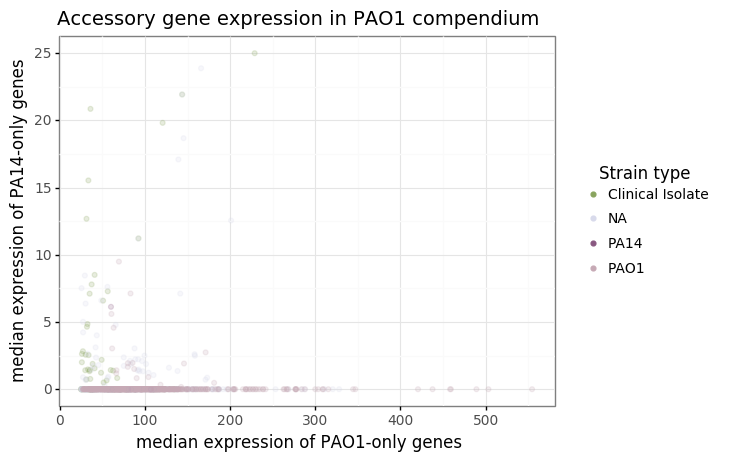

<ggplot: (8783612567213)>


In [15]:
# Plot accessory gene expression in PAO1 compendium
# Note: commented out code is for plotting figure for Georgia's manuscript
colors = {
    "Clinical Isolate": "#89A45E",
    "PA14": "#895881",
    "PAK": "#EF8B46",
    "PAO1": "#C6A9B5",
    "NA": "#D8DAEB",
}
fig1 = pn.ggplot(
    pao1_pa14_acc_pao1_compendium_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig1 += pn.scale_color_manual(values=colors)
fig1 += pn.geom_point(pn.aes(color="Strain type"), alpha=0.2)
fig1 += pn.labs(
    x="median expression of PAO1-only genes",
    y="median expression of PA14-only genes",
    title="Accessory gene expression in PAO1 compendium",
)
fig1 += pn.theme_bw()
fig1 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=12),
    legend_text=pn.element_text(family="sans-serif", size=10),
    plot_title=pn.element_text(family="sans-serif", size=14),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig1 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


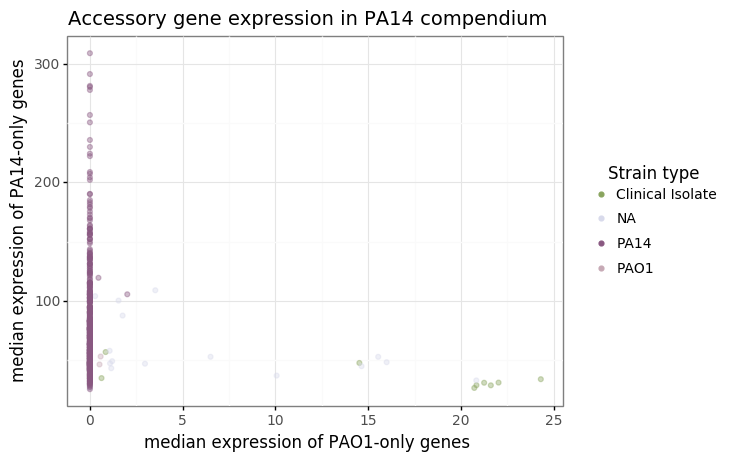

<ggplot: (8783611576945)>


In [16]:
# Plot accessory gene expression in PA14 compendium
fig2 = pn.ggplot(
    pao1_pa14_acc_pa14_compendium_label,
    pn.aes(x="median acc expression_pao1", y="median acc expression_pa14"),
)
fig2 += pn.scale_color_manual(values=colors)
fig2 += pn.geom_point(pn.aes(color="Strain type"), alpha=0.4)
fig2 += pn.labs(
    x="median expression of PAO1-only genes",
    y="median expression of PA14-only genes",
    title="Accessory gene expression in PA14 compendium",
)
fig2 += pn.theme_bw()
fig2 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=12),
    legend_text=pn.element_text(family="sans-serif", size=10),
    plot_title=pn.element_text(family="sans-serif", size=14),
    axis_text=pn.element_text(family="sans-serif", size=10),
    axis_title=pn.element_text(family="sans-serif", size=12),
)
fig2 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig2)

These plots are showing the median expression of PAO1 genes (PAO1 accessory genes) on the x-axis and the median expression of PA14-only genes (PA14 accessory genes) on the y-axis.
Each point is a sample.

If we binned our samples accurately then for samples within our binned PAO1 compendium, we expect that samples will align along the PAO1-only axis. Similarly, for samples within our binned PA14 compendium, we expect that samples will align along the PA14-axis.

## Check

What is the distribution of median accessory gene expression look like for PAO1 binned but non-PAO1 SRA labeled samples compared to PAO1 binned and PAO1 SRA labeled samples? Looks like the non-PAO1 labeled samples may be clustered at the bottom of the distribution. Similarly for PA14 binned samples.

In [17]:
# Get PAO1 samples that are labeled PAO1 and non-PAO1
pao1_binned_pao1_sra = pao1_pa14_acc_pao1_compendium_label.loc[
    pao1_pa14_acc_pao1_compendium_label["Strain type"] == "PAO1",
    "median acc expression_pao1",
]

pao1_binned_non_pao1_sra = pao1_pa14_acc_pao1_compendium_label.loc[
    pao1_pa14_acc_pao1_compendium_label["Strain type"] != "PAO1",
    "median acc expression_pao1",
]

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


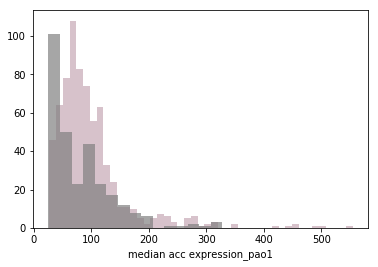

In [18]:
f = sns.distplot(
    pao1_binned_pao1_sra, color="#C6A9B5", kde=False, hist_kws={"alpha": 0.7}
)
f = sns.distplot(
    pao1_binned_non_pao1_sra, color="grey", kde=False, hist_kws={"alpha": 0.7}
)
if threshold == 0:
    plt.axvline(25, 0, 100, color="red")

In [19]:
# Get PA14 samples that are labeled PA14 and non-PA14
pa14_binned_pa14_sra = pao1_pa14_acc_pa14_compendium_label.loc[
    pao1_pa14_acc_pa14_compendium_label["Strain type"] == "PA14",
    "median acc expression_pa14",
]

pa14_binned_non_pa14_sra = pao1_pa14_acc_pa14_compendium_label.loc[
    pao1_pa14_acc_pa14_compendium_label["Strain type"] != "PA14",
    "median acc expression_pa14",
]

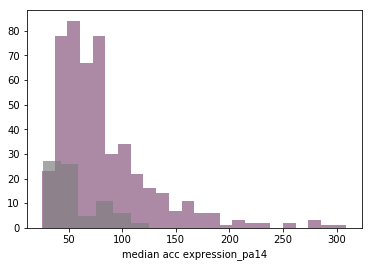

In [20]:
g = sns.distplot(
    pa14_binned_pa14_sra, color="#895881", kde=False, hist_kws={"alpha": 0.7}
)
g = sns.distplot(
    pa14_binned_non_pa14_sra, color="grey", kde=False, hist_kws={"alpha": 0.7}
)
if threshold == 0:
    plt.axvline(25, 0, 100, color="red")